In [5]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [6]:
df1=pd.read_csv('C:/Users/Revathy/Desktop/Youtube/Singapore/ResaleFlatPricesBasedonApprovalDate19901999.csv')
df2=pd.read_csv('C:/Users/Revathy/Desktop/Youtube/Singapore/ResaleFlatPricesBasedonApprovalDate2000Feb2012.csv')
df3=pd.read_csv('C:/Users/Revathy/Desktop/Youtube/Singapore/ResaleFlatPricesBasedonRegistrationDateFromMar2012toDec2014.csv')
df4=pd.read_csv('C:/Users/Revathy/Desktop/Youtube/Singapore/ResaleFlatPricesBasedonRegistrationDateFromJan2015toDec2016.csv')
df5=pd.read_csv('C:/Users/Revathy/Desktop/Youtube/Singapore/ResaleflatpricesbasedonregistrationdatefromJan2017onwards.csv')

In [7]:
# Merge all dataframes into a single dataframe
df = pd.concat([df1, df2, df3, df4, df5], ignore_index=True)

In [8]:
df

,month,town,flat_type,block,street_name,storey_range,floor_area_sqm,flat_model,lease_commence_date,resale_price,remaining_lease
0,1990-01,ANG MO KIO,1 ROOM,309,ANG MO KIO AVE 1,10 TO 12,31.0,IMPROVED,1977,9000.0,NaN
1,1990-01,ANG MO KIO,1 ROOM,309,ANG MO KIO AVE 1,04 TO 06,31.0,IMPROVED,1977,6000.0,NaN
2,1990-01,ANG MO KIO,1 ROOM,309,ANG MO KIO AVE 1,10 TO 12,31.0,IMPROVED,1977,8000.0,NaN
3,1990-01,ANG MO KIO,1 ROOM,309,ANG MO KIO AVE 1,07 TO 09,31.0,IMPROVED,1977,6000.0,NaN
4,1990-01,ANG MO KIO,3 ROOM,216,ANG MO KIO AVE 1,04 TO 06,73.0,NEW GENERATION,1976,47200.0,NaN
...,...,...,...,...,...,...,...,...,...,...,...
926928,2024-05,YISHUN,EXECUTIVE,360,YISHUN RING RD,04 TO 06,145.0,Apartment,1988,735000.0,63 years 03 months
926929,2024-05,YISHUN,EXECUTIVE,355A,YISHUN RING RD,01 TO 03,146.0,Maisonette,1988,815888.0,63 years 02 months
926930,2024-05,YISHUN,EXECUTIVE,292,YISHUN ST 22,01 TO 03,169.0,Apartment,1992,1032000.0,67 years 02 months
926931,2024-05,YISHUN,EXECUTIVE,643,YISHUN ST 61,10 TO 12,142.0,Apartment,1987,800000.0,62 years 05 months


In [9]:
#Data_cleaning
df.columns

Index(['month', 'town', 'flat_type', 'block', 'street_name', 'storey_range',
       'floor_area_sqm', 'flat_model', 'lease_commence_date', 'resale_price',
       'remaining_lease'],
      dtype='object')

In [10]:
#month
df.month[0]

'1990-01'

In [11]:
df.month.dtypes

dtype('O')

In [12]:
# Convert the 'date' column to datetime format
df['month'] = pd.to_datetime(df['month'])

# Print the data type of the 'date' column
print(df['month'].dtype)

datetime64[ns]


In [13]:
#month
df.month.unique()

<DatetimeArray>
['1990-01-01 00:00:00', '1990-02-01 00:00:00', '1990-03-01 00:00:00',
 '1990-04-01 00:00:00', '1990-05-01 00:00:00', '1990-06-01 00:00:00',
 '1990-07-01 00:00:00', '1990-08-01 00:00:00', '1990-09-01 00:00:00',
 '1990-10-01 00:00:00',
 ...
 '2023-08-01 00:00:00', '2023-09-01 00:00:00', '2023-10-01 00:00:00',
 '2023-11-01 00:00:00', '2023-12-01 00:00:00', '2024-01-01 00:00:00',
 '2024-02-01 00:00:00', '2024-03-01 00:00:00', '2024-04-01 00:00:00',
 '2024-05-01 00:00:00']
Length: 413, dtype: datetime64[ns]

In [14]:
df.month.isna().sum()

np.int64(0)

In [15]:
# Extract year and month into separate columns
from datetime import date
df['year'] = df['month'].dt.year
df['month'] = df['month'].dt.month

In [16]:
import numpy as np
import pandas as pd

def convert_to_months(lease_str):
    if pd.isna(lease_str):
        return np.nan
    elif isinstance(lease_str, (int, float)):
        return lease_str
    else:
        years, months, days = 0, 0, 0
        parts = lease_str.split()
        for i in range(len(parts)):
            if parts[i] == 'year' or parts[i] == 'years':
                years = int(parts[i - 1])
            elif parts[i] == 'month' or parts[i] == 'months':
                months = int(parts[i - 1])
            elif parts[i] == 'day' or parts[i] == 'days':
                days = int(parts[i - 1])
        total_months = years * 12 + months + days / 30  # Assuming 30 days in a month
        return total_months


In [17]:
df['remaining_lease_months'] = df['remaining_lease'].apply(convert_to_months)


In [18]:
del df['remaining_lease']

In [19]:
df

,month,town,flat_type,block,street_name,storey_range,floor_area_sqm,flat_model,lease_commence_date,resale_price,year,remaining_lease_months
0,1,ANG MO KIO,1 ROOM,309,ANG MO KIO AVE 1,10 TO 12,31.0,IMPROVED,1977,9000.0,1990,NaN
1,1,ANG MO KIO,1 ROOM,309,ANG MO KIO AVE 1,04 TO 06,31.0,IMPROVED,1977,6000.0,1990,NaN
2,1,ANG MO KIO,1 ROOM,309,ANG MO KIO AVE 1,10 TO 12,31.0,IMPROVED,1977,8000.0,1990,NaN
3,1,ANG MO KIO,1 ROOM,309,ANG MO KIO AVE 1,07 TO 09,31.0,IMPROVED,1977,6000.0,1990,NaN
4,1,ANG MO KIO,3 ROOM,216,ANG MO KIO AVE 1,04 TO 06,73.0,NEW GENERATION,1976,47200.0,1990,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...
926928,5,YISHUN,EXECUTIVE,360,YISHUN RING RD,04 TO 06,145.0,Apartment,1988,735000.0,2024,759.0
926929,5,YISHUN,EXECUTIVE,355A,YISHUN RING RD,01 TO 03,146.0,Maisonette,1988,815888.0,2024,758.0
926930,5,YISHUN,EXECUTIVE,292,YISHUN ST 22,01 TO 03,169.0,Apartment,1992,1032000.0,2024,806.0
926931,5,YISHUN,EXECUTIVE,643,YISHUN ST 61,10 TO 12,142.0,Apartment,1987,800000.0,2024,749.0


In [20]:
df=df.drop(columns="block")


In [21]:
df[["storey_start","storey_end"]] = df["storey_range"].str.split("TO",expand=True)

df["storey_start"] = df["storey_start"].astype(int)
df["storey_end"] = df["storey_end"].astype(int)

df.drop(["storey_range"],axis=1,inplace=True)

In [22]:
df=df[['month','year', 'town','flat_type','street_name','floor_area_sqm','flat_model','storey_start','storey_end','lease_commence_date','remaining_lease_months','resale_price']]

In [23]:
df6=df

In [24]:
df6

,month,year,town,flat_type,street_name,floor_area_sqm,flat_model,storey_start,storey_end,lease_commence_date,remaining_lease_months,resale_price
0,1,1990,ANG MO KIO,1 ROOM,ANG MO KIO AVE 1,31.0,IMPROVED,10,12,1977,NaN,9000.0
1,1,1990,ANG MO KIO,1 ROOM,ANG MO KIO AVE 1,31.0,IMPROVED,4,6,1977,NaN,6000.0
2,1,1990,ANG MO KIO,1 ROOM,ANG MO KIO AVE 1,31.0,IMPROVED,10,12,1977,NaN,8000.0
3,1,1990,ANG MO KIO,1 ROOM,ANG MO KIO AVE 1,31.0,IMPROVED,7,9,1977,NaN,6000.0
4,1,1990,ANG MO KIO,3 ROOM,ANG MO KIO AVE 1,73.0,NEW GENERATION,4,6,1976,NaN,47200.0
...,...,...,...,...,...,...,...,...,...,...,...,...
926928,5,2024,YISHUN,EXECUTIVE,YISHUN RING RD,145.0,Apartment,4,6,1988,759.0,735000.0
926929,5,2024,YISHUN,EXECUTIVE,YISHUN RING RD,146.0,Maisonette,1,3,1988,758.0,815888.0
926930,5,2024,YISHUN,EXECUTIVE,YISHUN ST 22,169.0,Apartment,1,3,1992,806.0,1032000.0
926931,5,2024,YISHUN,EXECUTIVE,YISHUN ST 61,142.0,Apartment,10,12,1987,749.0,800000.0


In [89]:
#town
df.town.unique()


array(['ANG MO KIO', 'BEDOK', 'BISHAN', 'BUKIT BATOK', 'BUKIT MERAH',
       'BUKIT TIMAH', 'CENTRAL AREA', 'CHOA CHU KANG', 'CLEMENTI',
       'GEYLANG', 'HOUGANG', 'JURONG EAST', 'JURONG WEST',
       'KALLANG/WHAMPOA', 'MARINE PARADE', 'QUEENSTOWN', 'SENGKANG',
       'SERANGOON', 'TAMPINES', 'TOA PAYOH', 'WOODLANDS', 'YISHUN',
       'LIM CHU KANG', 'SEMBAWANG', 'BUKIT PANJANG', 'PASIR RIS',
       'PUNGGOL'], dtype=object)

In [90]:
from sklearn.preprocessing import LabelEncoder
encoder=LabelEncoder()
df['town'] = encoder.fit_transform(df['town'])


In [91]:
df

,month,year,town,flat_type,street_name,floor_area_sqm,flat_model,storey_start,storey_end,lease_commence_date,remaining_lease_months,resale_price
0,1,1990,0,1 ROOM,ANG MO KIO AVE 1,31.0,IMPROVED,10,12,1977,NaN,9000.0
1,1,1990,0,1 ROOM,ANG MO KIO AVE 1,31.0,IMPROVED,4,6,1977,NaN,6000.0
2,1,1990,0,1 ROOM,ANG MO KIO AVE 1,31.0,IMPROVED,10,12,1977,NaN,8000.0
3,1,1990,0,1 ROOM,ANG MO KIO AVE 1,31.0,IMPROVED,7,9,1977,NaN,6000.0
4,1,1990,0,3 ROOM,ANG MO KIO AVE 1,73.0,NEW GENERATION,4,6,1976,NaN,47200.0
...,...,...,...,...,...,...,...,...,...,...,...,...
926928,5,2024,26,EXECUTIVE,YISHUN RING RD,145.0,Apartment,4,6,1988,759.0,735000.0
926929,5,2024,26,EXECUTIVE,YISHUN RING RD,146.0,Maisonette,1,3,1988,758.0,815888.0
926930,5,2024,26,EXECUTIVE,YISHUN ST 22,169.0,Apartment,1,3,1992,806.0,1032000.0
926931,5,2024,26,EXECUTIVE,YISHUN ST 61,142.0,Apartment,10,12,1987,749.0,800000.0


In [92]:
#flat_type
df.flat_type.unique()

array(['1 ROOM', '3 ROOM', '4 ROOM', '5 ROOM', '2 ROOM', 'EXECUTIVE',
       'MULTI GENERATION', 'MULTI-GENERATION'], dtype=object)

In [93]:
# Replace variations of 'MULTI GENERATION' with a consistent value
df['flat_type'] = df['flat_type'].replace(['MULTI GENERATION', 'MULTI-GENERATION'], 'MULTI_GENERATION')

In [94]:
#flat_type
df.flat_type.unique()

array(['1 ROOM', '3 ROOM', '4 ROOM', '5 ROOM', '2 ROOM', 'EXECUTIVE',
       'MULTI_GENERATION'], dtype=object)

In [95]:
df['flat_type']=df['flat_type'].map({'MULTI_GENERATION':6,'EXECUTIVE':5,'5 ROOM':4,'4 ROOM':3,'3 ROOM':2,'2 ROOM':1,'1 ROOM':0})

In [96]:
df

,month,year,town,flat_type,street_name,floor_area_sqm,flat_model,storey_start,storey_end,lease_commence_date,remaining_lease_months,resale_price
0,1,1990,0,0,ANG MO KIO AVE 1,31.0,IMPROVED,10,12,1977,NaN,9000.0
1,1,1990,0,0,ANG MO KIO AVE 1,31.0,IMPROVED,4,6,1977,NaN,6000.0
2,1,1990,0,0,ANG MO KIO AVE 1,31.0,IMPROVED,10,12,1977,NaN,8000.0
3,1,1990,0,0,ANG MO KIO AVE 1,31.0,IMPROVED,7,9,1977,NaN,6000.0
4,1,1990,0,2,ANG MO KIO AVE 1,73.0,NEW GENERATION,4,6,1976,NaN,47200.0
...,...,...,...,...,...,...,...,...,...,...,...,...
926928,5,2024,26,5,YISHUN RING RD,145.0,Apartment,4,6,1988,759.0,735000.0
926929,5,2024,26,5,YISHUN RING RD,146.0,Maisonette,1,3,1988,758.0,815888.0
926930,5,2024,26,5,YISHUN ST 22,169.0,Apartment,1,3,1992,806.0,1032000.0
926931,5,2024,26,5,YISHUN ST 61,142.0,Apartment,10,12,1987,749.0,800000.0


In [97]:
#street_name
df.street_name.unique()

array(['ANG MO KIO AVE 1', 'ANG MO KIO AVE 3', 'ANG MO KIO AVE 4',
       'ANG MO KIO AVE 10', 'ANG MO KIO AVE 5', 'ANG MO KIO AVE 8',
       'ANG MO KIO AVE 6', 'ANG MO KIO AVE 9', 'ANG MO KIO AVE 2',
       'BEDOK RESERVOIR RD', 'BEDOK NTH ST 3', 'BEDOK STH RD',
       'NEW UPP CHANGI RD', 'BEDOK NTH RD', 'BEDOK STH AVE 1',
       'CHAI CHEE RD', 'CHAI CHEE DR', 'BEDOK NTH AVE 4',
       'BEDOK STH AVE 3', 'BEDOK STH AVE 2', 'BEDOK NTH ST 2',
       'BEDOK NTH ST 4', 'BEDOK NTH AVE 2', 'BEDOK NTH AVE 3',
       'BEDOK NTH AVE 1', 'BEDOK NTH ST 1', 'CHAI CHEE ST', 'SIN MING RD',
       'SHUNFU RD', 'BT BATOK ST 11', 'BT BATOK WEST AVE 8',
       'BT BATOK WEST AVE 6', 'BT BATOK ST 21', 'BT BATOK EAST AVE 5',
       'BT BATOK EAST AVE 4', 'HILLVIEW AVE', 'BT BATOK CTRL',
       'BT BATOK ST 31', 'BT BATOK EAST AVE 3', 'TAMAN HO SWEE',
       'TELOK BLANGAH CRES', 'BEO CRES', 'TELOK BLANGAH DR', 'DEPOT RD',
       'TELOK BLANGAH RISE', 'JLN BT MERAH', 'HENDERSON RD', 'INDUS RD',
       

In [98]:
from sklearn.preprocessing import LabelEncoder
encoder=LabelEncoder()
df['street_name'] = encoder.fit_transform(df['street_name'])

In [99]:
df

,month,year,town,flat_type,street_name,floor_area_sqm,flat_model,storey_start,storey_end,lease_commence_date,remaining_lease_months,resale_price
0,1,1990,0,0,13,31.0,IMPROVED,10,12,1977,NaN,9000.0
1,1,1990,0,0,13,31.0,IMPROVED,4,6,1977,NaN,6000.0
2,1,1990,0,0,13,31.0,IMPROVED,10,12,1977,NaN,8000.0
3,1,1990,0,0,13,31.0,IMPROVED,7,9,1977,NaN,6000.0
4,1,1990,0,2,13,73.0,NEW GENERATION,4,6,1976,NaN,47200.0
...,...,...,...,...,...,...,...,...,...,...,...,...
926928,5,2024,26,5,563,145.0,Apartment,4,6,1988,759.0,735000.0
926929,5,2024,26,5,563,146.0,Maisonette,1,3,1988,758.0,815888.0
926930,5,2024,26,5,567,169.0,Apartment,1,3,1992,806.0,1032000.0
926931,5,2024,26,5,572,142.0,Apartment,10,12,1987,749.0,800000.0


In [100]:
#floor_area_sqm
df.floor_area_sqm.dtypes

dtype('float64')

In [101]:
df.floor_area_sqm.isna().sum()

np.int64(0)

In [102]:
#flat_model
df.flat_model.unique()

array(['IMPROVED', 'NEW GENERATION', 'MODEL A', 'STANDARD', 'SIMPLIFIED',
       'MODEL A-MAISONETTE', 'APARTMENT', 'MAISONETTE', 'TERRACE',
       '2-ROOM', 'IMPROVED-MAISONETTE', 'MULTI GENERATION',
       'PREMIUM APARTMENT', 'Improved', 'New Generation', 'Model A',
       'Standard', 'Apartment', 'Simplified', 'Model A-Maisonette',
       'Maisonette', 'Multi Generation', 'Adjoined flat',
       'Premium Apartment', 'Terrace', 'Improved-Maisonette',
       'Premium Maisonette', '2-room', 'Model A2', 'DBSS', 'Type S1',
       'Type S2', 'Premium Apartment Loft', '3Gen'], dtype=object)

In [103]:
from sklearn.preprocessing import LabelEncoder
encoder=LabelEncoder()
df['flat_model'] = encoder.fit_transform(df['flat_model'])

In [104]:
df

,month,year,town,flat_type,street_name,floor_area_sqm,flat_model,storey_start,storey_end,lease_commence_date,remaining_lease_months,resale_price
0,1,1990,0,0,13,31.0,7,10,12,1977,NaN,9000.0
1,1,1990,0,0,13,31.0,7,4,6,1977,NaN,6000.0
2,1,1990,0,0,13,31.0,7,10,12,1977,NaN,8000.0
3,1,1990,0,0,13,31.0,7,7,9,1977,NaN,6000.0
4,1,1990,0,2,13,73.0,20,4,6,1976,NaN,47200.0
...,...,...,...,...,...,...,...,...,...,...,...,...
926928,5,2024,26,5,563,145.0,5,4,6,1988,759.0,735000.0
926929,5,2024,26,5,563,146.0,15,1,3,1988,758.0,815888.0
926930,5,2024,26,5,567,169.0,5,1,3,1992,806.0,1032000.0
926931,5,2024,26,5,572,142.0,5,10,12,1987,749.0,800000.0


In [105]:
#lease_commence_date
df['lease_commence_date'].dtypes

dtype('int64')

In [106]:
df['lease_commence_date'].isna().sum()

np.int64(0)

In [107]:
df.remaining_lease_months.isna().sum()

np.int64(709050)

In [108]:
df['remaining_lease_months']=df['remaining_lease_months'].fillna(0,inplace=False)

In [109]:
df.remaining_lease_months.isna().sum()

np.int64(0)

In [110]:
#resale_price
df['resale_price'].dtypes

dtype('float64')

In [111]:
df['resale_price'].isna().sum()

np.int64(0)

In [112]:
df

,month,year,town,flat_type,street_name,floor_area_sqm,flat_model,storey_start,storey_end,lease_commence_date,remaining_lease_months,resale_price
0,1,1990,0,0,13,31.0,7,10,12,1977,0.0,9000.0
1,1,1990,0,0,13,31.0,7,4,6,1977,0.0,6000.0
2,1,1990,0,0,13,31.0,7,10,12,1977,0.0,8000.0
3,1,1990,0,0,13,31.0,7,7,9,1977,0.0,6000.0
4,1,1990,0,2,13,73.0,20,4,6,1976,0.0,47200.0
...,...,...,...,...,...,...,...,...,...,...,...,...
926928,5,2024,26,5,563,145.0,5,4,6,1988,759.0,735000.0
926929,5,2024,26,5,563,146.0,15,1,3,1988,758.0,815888.0
926930,5,2024,26,5,567,169.0,5,1,3,1992,806.0,1032000.0
926931,5,2024,26,5,572,142.0,5,10,12,1987,749.0,800000.0


In [113]:
#DataCleaning
#Missing
#Duplicates
#Dtypes
#Outliers
#Structured

In [114]:
#Missing
df.isna().sum()

month                     0
year                      0
town                      0
flat_type                 0
street_name               0
floor_area_sqm            0
flat_model                0
storey_start              0
storey_end                0
lease_commence_date       0
remaining_lease_months    0
resale_price              0
dtype: int64

In [115]:
#Duplicates
df=df.drop_duplicates()
df

,month,year,town,flat_type,street_name,floor_area_sqm,flat_model,storey_start,storey_end,lease_commence_date,remaining_lease_months,resale_price
0,1,1990,0,0,13,31.0,7,10,12,1977,0.0,9000.0
1,1,1990,0,0,13,31.0,7,4,6,1977,0.0,6000.0
2,1,1990,0,0,13,31.0,7,10,12,1977,0.0,8000.0
3,1,1990,0,0,13,31.0,7,7,9,1977,0.0,6000.0
4,1,1990,0,2,13,73.0,20,4,6,1976,0.0,47200.0
...,...,...,...,...,...,...,...,...,...,...,...,...
926928,5,2024,26,5,563,145.0,5,4,6,1988,759.0,735000.0
926929,5,2024,26,5,563,146.0,15,1,3,1988,758.0,815888.0
926930,5,2024,26,5,567,169.0,5,1,3,1992,806.0,1032000.0
926931,5,2024,26,5,572,142.0,5,10,12,1987,749.0,800000.0


In [116]:
#Dtypes
df.dtypes

month                       int32
year                        int32
town                        int64
flat_type                   int64
street_name                 int64
floor_area_sqm            float64
flat_model                  int64
storey_start                int64
storey_end                  int64
lease_commence_date         int64
remaining_lease_months    float64
resale_price              float64
dtype: object

In [117]:
#Structured
#Yes,its a structured data

In [118]:
#Outlier
#Outliers
columns=list(df.columns)
print(columns)
for i in columns:
   print(f"column:{i}")
   iqr=df[i].quantile(0.75)-df[i].quantile(0.25)
   low_th=df[i].quantile(0.25)-(1.5*iqr)
   up_th=df[i].quantile(0.75)+(1.5*iqr)
   df[i]=df[i].clip(low_th,up_th)
   print(low_th,up_th)
   print(df[i].describe())

['month', 'year', 'town', 'flat_type', 'street_name', 'floor_area_sqm', 'flat_model', 'storey_start', 'storey_end', 'lease_commence_date', 'remaining_lease_months', 'resale_price']
column:month
-5.0 19.0
count    921274.000000
mean          6.551598
std           3.414281
min           1.000000
25%           4.000000
50%           7.000000
75%          10.000000
max          12.000000
Name: month, dtype: float64
column:year
1976.5 2036.5
count    921274.000000
mean       2006.187110
std           9.317691
min        1990.000000
25%        1999.000000
50%        2005.000000
75%        2014.000000
max        2024.000000
Name: year, dtype: float64
column:town


C:\Users\Revathy\AppData\Local\Temp\ipykernel_10976\3960651772.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df[i]=df[i].clip(low_th,up_th)
C:\Users\Revathy\AppData\Local\Temp\ipykernel_10976\3960651772.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df[i]=df[i].clip(low_th,up_th)
C:\Users\Revathy\AppData\Local\Temp\ipykernel_10976\3960651772.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead


-22.0 50.0
count    921274.000000
mean         13.653171
std           8.792618
min           0.000000
25%           5.000000
50%          13.000000
75%          23.000000
max          26.000000
Name: town, dtype: float64
column:flat_type
-1.0 7.0
count    921274.000000
mean          3.015929
std           0.948606
min           0.000000
25%           2.000000
50%           3.000000
75%           4.000000
max           6.000000
Name: flat_type, dtype: float64
column:street_name
-385.0 967.0
count    921274.000000
mean        286.002442
std         181.519778
min           0.000000
25%         122.000000
50%         278.000000
75%         460.000000
max         583.000000
Name: street_name, dtype: float64
column:floor_area_sqm


C:\Users\Revathy\AppData\Local\Temp\ipykernel_10976\3960651772.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df[i]=df[i].clip(low_th,up_th)
C:\Users\Revathy\AppData\Local\Temp\ipykernel_10976\3960651772.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df[i]=df[i].clip(low_th,up_th)
C:\Users\Revathy\AppData\Local\Temp\ipykernel_10976\3960651772.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead


13.0 173.0
count    921274.000000
mean         95.723350
std          25.732145
min          28.000000
25%          73.000000
50%          93.000000
75%         113.000000
max         173.000000
Name: floor_area_sqm, dtype: float64
column:flat_model
-9.0 39.0
count    921274.000000
mean         15.711098
std           6.668218
min           0.000000
25%           9.000000
50%          16.000000
75%          21.000000
max          33.000000
Name: flat_model, dtype: float64
column:storey_start


C:\Users\Revathy\AppData\Local\Temp\ipykernel_10976\3960651772.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df[i]=df[i].clip(low_th,up_th)
C:\Users\Revathy\AppData\Local\Temp\ipykernel_10976\3960651772.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df[i]=df[i].clip(low_th,up_th)


-5.0 19.0
count    921274.000000
mean          6.583971
std           4.452232
min           1.000000
25%           4.000000
50%           7.000000
75%          10.000000
max          19.000000
Name: storey_start, dtype: float64
column:storey_end
-3.0 21.0
count    921274.000000
mean          8.598455
std           4.451367
min           3.000000
25%           6.000000
50%           9.000000
75%          12.000000
max          21.000000
Name: storey_end, dtype: float64
column:lease_commence_date


C:\Users\Revathy\AppData\Local\Temp\ipykernel_10976\3960651772.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df[i]=df[i].clip(low_th,up_th)
C:\Users\Revathy\AppData\Local\Temp\ipykernel_10976\3960651772.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df[i]=df[i].clip(low_th,up_th)


1958.5 2018.5
count    921274.000000
mean       1988.278956
std          10.650281
min        1966.000000
25%        1981.000000
50%        1986.000000
75%        1996.000000
max        2018.500000
Name: lease_commence_date, dtype: float64
column:remaining_lease_months
0.0 0.0
count    921274.0
mean          0.0
std           0.0
min           0.0
25%           0.0
50%           0.0
75%           0.0
max           0.0
Name: remaining_lease_months, dtype: float64
column:resale_price
-142000.0 754000.0
count    921274.000000
mean     318815.541566
std      162915.194396
min        5000.000000
25%      194000.000000
50%      298000.000000
75%      418000.000000
max      754000.000000
Name: resale_price, dtype: float64


C:\Users\Revathy\AppData\Local\Temp\ipykernel_10976\3960651772.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df[i]=df[i].clip(low_th,up_th)
C:\Users\Revathy\AppData\Local\Temp\ipykernel_10976\3960651772.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df[i]=df[i].clip(low_th,up_th)


In [119]:
df

,month,year,town,flat_type,street_name,floor_area_sqm,flat_model,storey_start,storey_end,lease_commence_date,remaining_lease_months,resale_price
0,1,1990,0,0,13,31.0,7,10,12,1977.0,0.0,9000.0
1,1,1990,0,0,13,31.0,7,4,6,1977.0,0.0,6000.0
2,1,1990,0,0,13,31.0,7,10,12,1977.0,0.0,8000.0
3,1,1990,0,0,13,31.0,7,7,9,1977.0,0.0,6000.0
4,1,1990,0,2,13,73.0,20,4,6,1976.0,0.0,47200.0
...,...,...,...,...,...,...,...,...,...,...,...,...
926928,5,2024,26,5,563,145.0,5,4,6,1988.0,0.0,735000.0
926929,5,2024,26,5,563,146.0,15,1,3,1988.0,0.0,754000.0
926930,5,2024,26,5,567,169.0,5,1,3,1992.0,0.0,754000.0
926931,5,2024,26,5,572,142.0,5,10,12,1987.0,0.0,754000.0


,month,resale_price
month,1.00000,0.22432
resale_price,0.22432,1.00000


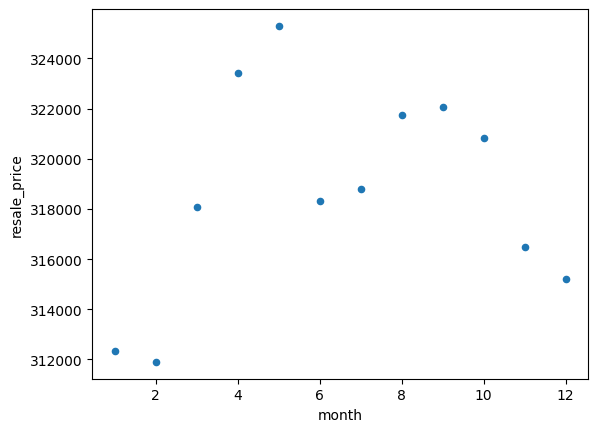

In [120]:
#EDA
df.groupby('month')['resale_price'].mean().reset_index().plot.scatter(x='month',y='resale_price')
df.groupby('month')['resale_price'].mean().reset_index().corr()

,flat_type,resale_price
flat_type,1.000000,0.987825
resale_price,0.987825,1.000000


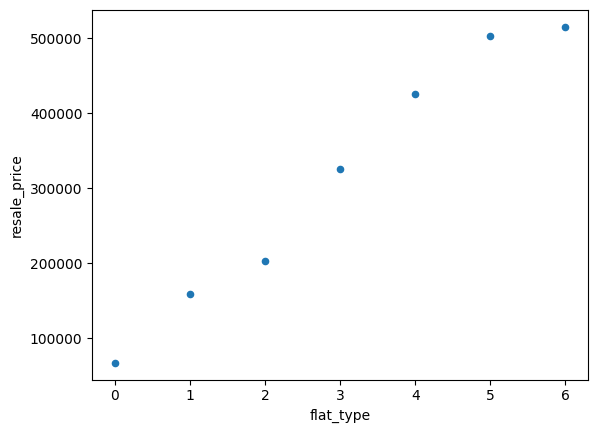

In [ ]:
df.groupby('flat_type')['resale_price'].mean().reset_index().plot.scatter(x='flat_type',y='resale_price')
df.groupby('flat_type')['resale_price'].mean().reset_index().corr()

,floor_area_sqm,resale_price
floor_area_sqm,1.000000,0.903612
resale_price,0.903612,1.000000


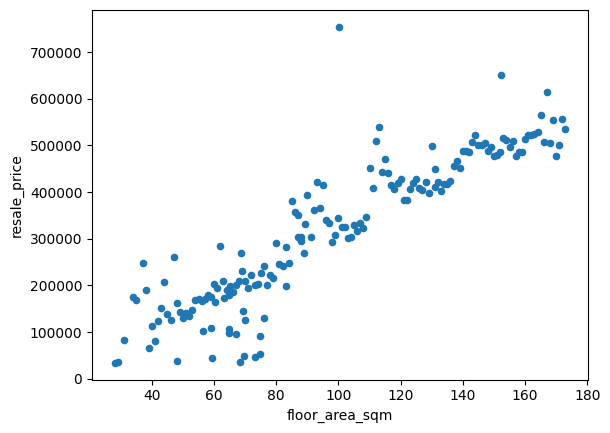

In [122]:
df.groupby('floor_area_sqm')['resale_price'].mean().reset_index().plot.scatter(x='floor_area_sqm',y='resale_price')
df.groupby('floor_area_sqm')['resale_price'].mean().reset_index().corr()

,lease_commence_date,resale_price
lease_commence_date,1.000000,0.955312
resale_price,0.955312,1.000000


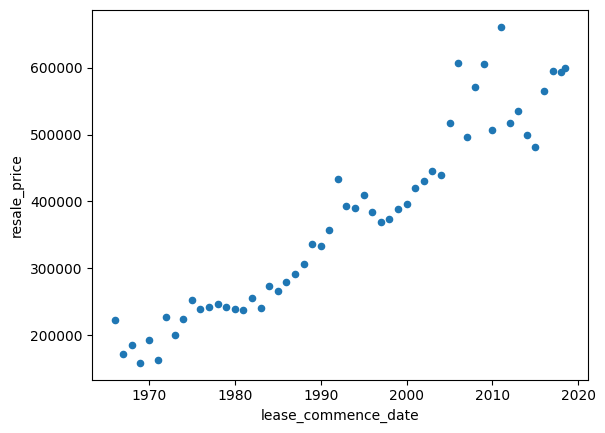

In [123]:
df.groupby('lease_commence_date')['resale_price'].mean().reset_index().plot.scatter(x='lease_commence_date',y='resale_price')
df.groupby('lease_commence_date')['resale_price'].mean().reset_index().corr()

,year,resale_price
year,1.000000,0.941972
resale_price,0.941972,1.000000


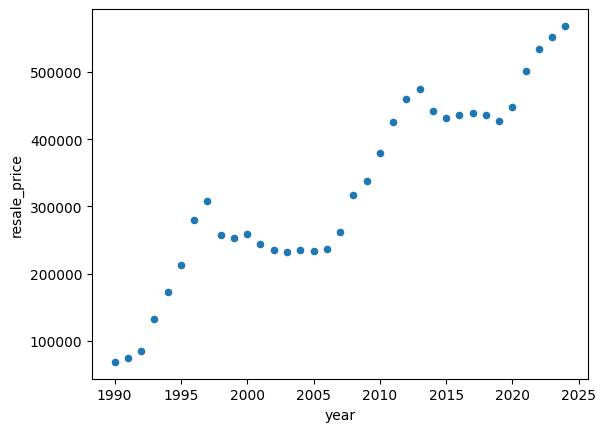

In [124]:
#EDA
df.groupby('year')['resale_price'].mean().reset_index().plot.scatter(x='year',y='resale_price')
df.groupby('year')['resale_price'].mean().reset_index().corr()

In [125]:
df.columns

Index(['month', 'year', 'town', 'flat_type', 'street_name', 'floor_area_sqm',
       'flat_model', 'storey_start', 'storey_end', 'lease_commence_date',
       'remaining_lease_months', 'resale_price'],
      dtype='object')

,town,resale_price
town,1.000000,0.062002
resale_price,0.062002,1.000000


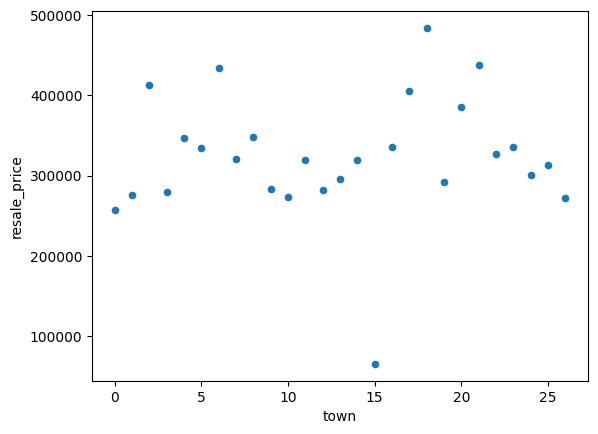

In [126]:
#EDA
df.groupby('town')['resale_price'].mean().reset_index().plot.scatter(x='town',y='resale_price')
df.groupby('town')['resale_price'].mean().reset_index().corr()

,flat_model,resale_price
flat_model,1.000000,0.147007
resale_price,0.147007,1.000000


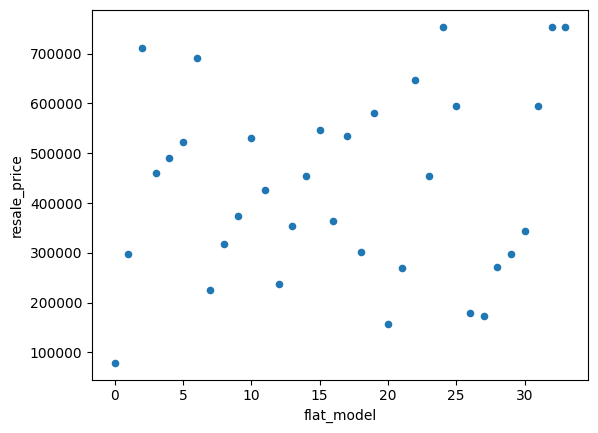

In [127]:
#EDA
df.groupby('flat_model')['resale_price'].mean().reset_index().plot.scatter(x='flat_model',y='resale_price')
df.groupby('flat_model')['resale_price'].mean().reset_index().corr()

,storey_start,resale_price
storey_start,1.00000,0.70394
resale_price,0.70394,1.00000


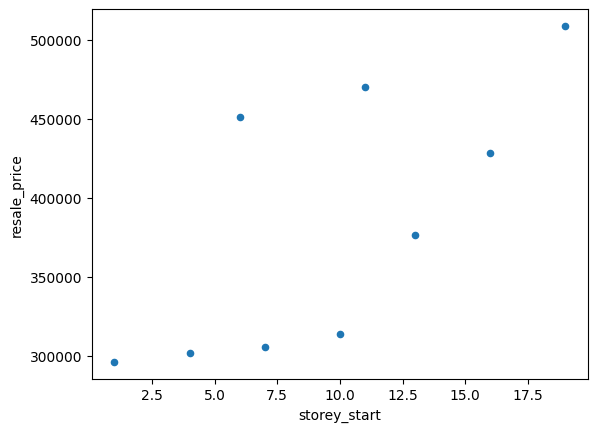

In [128]:
#EDA
df.groupby('storey_start')['resale_price'].mean().reset_index().plot.scatter(x='storey_start',y='resale_price')
df.groupby('storey_start')['resale_price'].mean().reset_index().corr()

,storey_end,resale_price
storey_end,1.000000,0.713976
resale_price,0.713976,1.000000


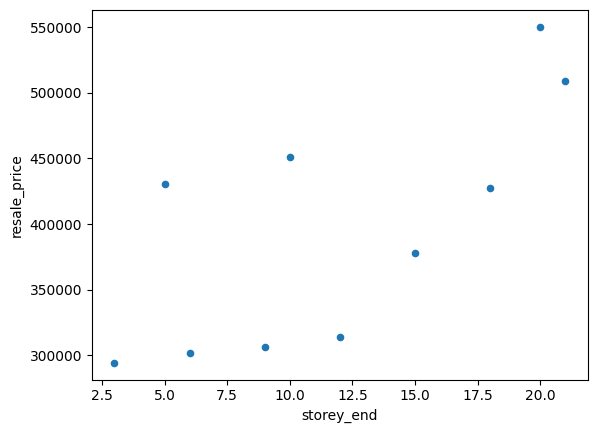

In [129]:
#EDA
df.groupby('storey_end')['resale_price'].mean().reset_index().plot.scatter(x='storey_end',y='resale_price')
df.groupby('storey_end')['resale_price'].mean().reset_index().corr()

,remaining_lease_months,resale_price
remaining_lease_months,NaN,NaN
resale_price,NaN,NaN


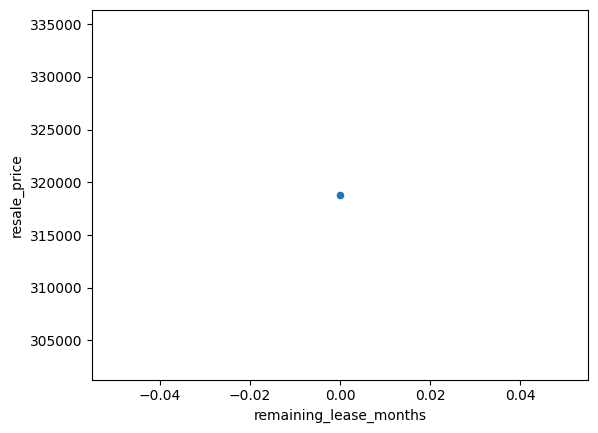

In [130]:
#EDA
df.groupby('remaining_lease_months')['resale_price'].mean().reset_index().plot.scatter(x='remaining_lease_months',y='resale_price')
df.groupby('remaining_lease_months')['resale_price'].mean().reset_index().corr()

In [131]:
df

,month,year,town,flat_type,street_name,floor_area_sqm,flat_model,storey_start,storey_end,lease_commence_date,remaining_lease_months,resale_price
0,1,1990,0,0,13,31.0,7,10,12,1977.0,0.0,9000.0
1,1,1990,0,0,13,31.0,7,4,6,1977.0,0.0,6000.0
2,1,1990,0,0,13,31.0,7,10,12,1977.0,0.0,8000.0
3,1,1990,0,0,13,31.0,7,7,9,1977.0,0.0,6000.0
4,1,1990,0,2,13,73.0,20,4,6,1976.0,0.0,47200.0
...,...,...,...,...,...,...,...,...,...,...,...,...
926928,5,2024,26,5,563,145.0,5,4,6,1988.0,0.0,735000.0
926929,5,2024,26,5,563,146.0,15,1,3,1988.0,0.0,754000.0
926930,5,2024,26,5,567,169.0,5,1,3,1992.0,0.0,754000.0
926931,5,2024,26,5,572,142.0,5,10,12,1987.0,0.0,754000.0


In [132]:
#split
from sklearn.model_selection import train_test_split
x=df.loc[:,df.columns!='resale_price']
y=df['resale_price']
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.25,random_state=7)

In [133]:
#Scale(Not Mandatory)

In [134]:
#Model
#Linear_Regression
from sklearn.linear_model import LinearRegression
model=LinearRegression()
model.fit(x_train,y_train)
model.score(x_test,y_test)

0.779061023342863

In [135]:
#Decision_Tree
from sklearn.tree import DecisionTreeRegressor
model=DecisionTreeRegressor()
model.fit(x_train,y_train)
model.score(x_test,y_test)

0.9703519998825462

In [137]:
from sklearn.model_selection import cross_val_score
for i in [1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24,25]:
  #print(f"depth:{i}")
  model=DecisionTreeRegressor(max_depth=i)
  model.fit(x_train,y_train)
  model.predict(x_test)
  train_sc=model.score(x_train,y_train)
  c_v=np.mean(cross_val_score(model,x_train,y_train,cv=10))
  print(f"train_sc:{train_sc},cross_va={c_v},dep:{i}")

train_sc:0.42215476319618817,cross_va=0.4221337749690627,dep:1
train_sc:0.6499713723018455,cross_va=0.6499569746850393,dep:2
train_sc:0.7327305203167658,cross_va=0.7327108949951143,dep:3
train_sc:0.803312074690214,cross_va=0.8030878305899986,dep:4
train_sc:0.8351633932342954,cross_va=0.8350878228467102,dep:5
train_sc:0.8564154167468696,cross_va=0.8562996558127942,dep:6
train_sc:0.8742808485280555,cross_va=0.8740908521150343,dep:7
train_sc:0.8899078959367841,cross_va=0.8893803436296309,dep:8
train_sc:0.901217656531103,cross_va=0.9004133195235546,dep:9
train_sc:0.9124773956065223,cross_va=0.9115872033784086,dep:10
train_sc:0.9243380421181415,cross_va=0.9228093807984317,dep:11
train_sc:0.9341400906713635,cross_va=0.931977707465973,dep:12
train_sc:0.9425061560382724,cross_va=0.9397063686814775,dep:13
train_sc:0.9503877715517944,cross_va=0.946528812187653,dep:14
train_sc:0.9578128823206049,cross_va=0.952662800612506,dep:15
train_sc:0.9654134336390856,cross_va=0.9585907300700592,dep:16
train

In [138]:
#Decision_Tree
from sklearn.tree import DecisionTreeRegressor
model=DecisionTreeRegressor(max_depth=25)
model.fit(x_train,y_train)
model.score(x_test,y_test)

0.9721210900990662

In [139]:
#Random_forest
import math
#Finding best hyperparamter
from sklearn.ensemble import RandomForestRegressor
max_dep = round(math.log2(10))

model = RandomForestRegressor(max_depth =max_dep, max_features = "sqrt")
for i in [10,20,30,50,100,200]:
    model = RandomForestRegressor(n_estimators = i, max_depth = max_dep, max_features = "sqrt")
    cross_score = np.mean(cross_val_score(model,x_train, y_train, cv = 10))
    print(f"N: {i}, Cross-Val Score: {cross_score}")


N: 10, Cross-Val Score: 0.6899311992124397
N: 20, Cross-Val Score: 0.7021395068588028
N: 30, Cross-Val Score: 0.7165387248813985
N: 50, Cross-Val Score: 0.7133072104871758
N: 100, Cross-Val Score: 0.7074655753862163
N: 200, Cross-Val Score: 0.7153985989247389


In [140]:
import math
#Finding best hyperparamter
from sklearn.ensemble import RandomForestRegressor
max_dep = round(math.log2(10))
model = RandomForestRegressor(n_estimators = 100, max_depth = max_dep, max_features = "sqrt")
cross_score = np.mean(cross_val_score(model,x_train, y_train, cv = 10))
print(f"N: {i}, Cross-Val Score: {cross_score}")


N: 200, Cross-Val Score: 0.7140387785085089


In [143]:
#XGBOOST
from xgboost import XGBRegressor

for lamb in [0.001, 0.002, 0.005, 0.006, 0.1, 0.2, 0.5,0.9,1]:
  model = XGBRegressor(learning_rate = lamb)
  cross_score = np.mean(cross_val_score(model, x_train, y_train, cv = 10))
  print(f"Lambda: {lamb}, Cross-Val Score: {cross_score}")

ModuleNotFoundError: No module named 'xgboost'

In [ ]:
from xgboost import XGBRegressor
model = XGBRegressor(learning_rate =0.5)
model.fit(x_train, y_train)
print(f"Test data accuracy : {model.score(x_test, y_test)}")

In [28]:
df6.to_csv('singapore.csv')


In [29]:
import pandas as pd

# Load your DataFrame
df = pd.read_csv('singapore.csv')

# Save the DataFrame to a gzip compressed file
df.to_csv('singapore.csv.gz', index=False, compression='gzip')

In [ ]:
#Logistic_Regression  -0.874071686074389
#DecisionTree         -0.966778125351362
#Random_Forest        -0.5323076411236876
#XGBooster            -0.9767399695034893
#From above scores we can conclude XGBooster is a best model